In [63]:
library(tidyverse)
library(purrr)
library(treemap)
library(RColorBrewer)
library(psych)

# Import and Tidy:

Initial Import:

In [64]:
movies <- read_csv("supporting_files/movie_metadata.csv")
head(movies)

Parsed with column specification:
cols(
  .default = col_integer(),
  color = col_character(),
  director_name = col_character(),
  actor_2_name = col_character(),
  genres = col_character(),
  actor_1_name = col_character(),
  movie_title = col_character(),
  actor_3_name = col_character(),
  plot_keywords = col_character(),
  movie_imdb_link = col_character(),
  language = col_character(),
  country = col_character(),
  content_rating = col_character(),
  imdb_score = col_double(),
  aspect_ratio = col_double()
)
See spec(...) for full column specifications.
Warning message:
“4 parsing failures.
 row    col   expected      actual                                  file
2324 budget an integer 2400000000  'supporting_files/movie_metadata.csv'
2989 budget an integer 12215500000 'supporting_files/movie_metadata.csv'
3006 budget an integer 2500000000  'supporting_files/movie_metadata.csv'
3860 budget an integer 4200000000  'supporting_files/movie_metadata.csv'
”

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Transpose to make easier to understand:

In [65]:
glimpse(movies)

Observations: 5,043
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Examine parsing errors:

In [66]:
parse_errs <- problems(movies)
parse_errs

row,col,expected,actual,file
2324,budget,an integer,2400000000,'supporting_files/movie_metadata.csv'
2989,budget,an integer,12215500000,'supporting_files/movie_metadata.csv'
3006,budget,an integer,2500000000,'supporting_files/movie_metadata.csv'
3860,budget,an integer,4200000000,'supporting_files/movie_metadata.csv'


Why such high budgets? Pull out each row and transpose to see details:

In [67]:
prob_values <- movies[parse_errs$row,]
glimpse(prob_values)

Observations: 4
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color"
$ director_name             <chr> "Hayao Miyazaki", "Joon-ho Bong", "Lajos ...
$ num_critic_for_reviews    <int> 174, 363, 73, 202
$ duration                  <int> 134, 110, 134, 112
$ director_facebook_likes   <int> 6000, 584, 45, 0
$ actor_3_facebook_likes    <int> 745, 74, 0, 38
$ actor_2_name              <chr> "Jada Pinkett Smith", "Kang-ho Song", "Pé...
$ actor_1_facebook_likes    <int> 893, 629, 9, 717
$ gross                     <int> 2298191, 2201412, 195888, 211667
$ genres                    <chr> "Adventure|Animation|Fantasy", "Comedy|Dr...
$ actor_1_name              <chr> "Minnie Driver", "Doona Bae", "Marcell Na...
$ movie_title               <chr> "Princess Mononoke ", "The Host ", "Fatel...
$ num_voted_users           <int> 221552, 68883, 5603, 53508
$ cast_total_facebook_likes <int> 2710, 1173, 11, 907
$ actor_3_name              <chr> "Billy Crudup", "Ah-sung Ko", "Bál

All international films - I'm betting they're showing the `budget` column all in a foreign currency. Note, Tibble framework sets all parsing errors to `NA`, so I'll disregard for now and let them be `NA`.

Finally, look at summary of data frame to understand even better:

In [68]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:5043        Length:5043        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :140.2          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :50             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:5043       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  371.5        Mode  :character  
 Mean   :  686.5         Mean   :  645.0                          
 3rd Qu.:  194.5         3rd Qu.:  636.0 

Things to keep an eye on from looking at summary again:

* multiple variables have `NA` instead of a value. Ones to be aware of:
  * `duration`: strange that a movie's duration is unknown. Thankfully only 15 instances.
  * `budget`: also strange if no value here, but for the 4 instances of foreign film I found, makes sense. Many more here, at 496.
  * `title_year`: each film definitely has a year it was finished, so strange that 108 instances
  * `aspect_ratio`: 329 instances. But note not really interesting variable given aspect ratio is often modified for some films (3:4 to 16:9)
  * some values may be very excessive - like in `budget`, which has a max of approximatel 2,128,000,000. I'm sure never been movie made for over two billion dollars

Is the data "tidy"?:

* each variable has its own column? Of the 28 variables shown, each represents a unique type of measurement. Check.
* each observation has its own row? Yes, no values exist that branch out into their own measurements. Check.
* each value has its own cell? No, but will treat `plot_keywords` and `generes` as-is. Notes:
  * `genres` is up to five genre keywords in alphabetical order and strings restricted to a representative keyword (ex. there is SciFi but no Scifi). Can leverage this by treating each unique combination as a measurement.
  * `plot_keywords` has a small number of keywords, but nearly infinite number of combinations of any word or short phrase from human language. So leaving this as-is (but possibly using n-grams or something else)
 
Finally, are there any duplicate observations?

In [69]:
dupes <- which(duplicated(movies))
dupes
head(movies[dupes,])

[1]  138  188  205  304  390  396  591  657  795 1221 1306 1450 2170 2293 2473
[16] 2494 2534 2563 2569 2620 2772 2778 2799 2972 3118 3346 3453 3481 3730 3901
[31] 3916 4183 4227 4283 4314 4409 4566 4574 4632 4770 4883 4928 4943 4951 4952

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,David Yates,248,110,282,103,Alexander Skarsgård,11000,124051759,Action|Adventure|Drama|Romance,⋯,239,English,USA,PG-13,180000000,2016,10000,6.6,2.35,29000
Color,Bill Condon,322,115,386,12000,Kristen Stewart,21000,292298923,Adventure|Drama|Fantasy|Romance,⋯,329,English,USA,PG-13,120000000,2012,17000,5.5,2.35,65000
Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,NA,NA,2016,106,8.2,2.35,0
Color,Joe Wright,256,111,456,394,Cara Delevingne,20000,34964818,Adventure|Family|Fantasy,⋯,186,English,USA,PG,150000000,2015,548,5.8,2.35,24000
Color,Josh Trank,369,100,128,78,Reg E. Cathey,596,56114221,Action|Adventure|Sci-Fi,⋯,695,English,USA,PG-13,120000000,2015,360,4.3,2.35,41000
Color,Rob Cohen,187,106,357,4000,Vin Diesel,23000,144512310,Action|Crime|Thriller,⋯,988,English,USA,PG-13,38000000,2001,14000,6.7,2.35,14000


Yes, so create new data frame that removes all duplicate observations:

In [70]:
movies <- movies[which(!duplicated(movies)),]
head(movies)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [71]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:4998        Length:4998        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :139.9          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :49             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:4998       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  369.0        Mode  :character  
 Mean   :  688.7         Mean   :  639.9                          
 3rd Qu.:  192.0         3rd Qu.:  635.0 

Left with 4,998 rows. So in summary, checked for parsing errors, reviewed data frame for NA and extreme values, checked if tidy, removed duplicates. Good to go!

### Review/document data and its structure
So what do I have here? No documentation on Kaggle. Looked at spreadsheet and compared against web page for a given movie. My best guesses for variables and what they mean (only ones that are not obvious):

Look at all variables:

In [72]:
colnames(movies)

[1] "color"                     "director_name"            
 [3] "num_critic_for_reviews"    "duration"                 
 [5] "director_facebook_likes"   "actor_3_facebook_likes"   
 [7] "actor_2_name"              "actor_1_facebook_likes"   
 [9] "gross"                     "genres"                   
[11] "actor_1_name"              "movie_title"              
[13] "num_voted_users"           "cast_total_facebook_likes"
[15] "actor_3_name"              "facenumber_in_poster"     
[17] "plot_keywords"             "movie_imdb_link"          
[19] "num_user_for_reviews"      "language"                 
[21] "country"                   "content_rating"           
[23] "budget"                    "title_year"               
[25] "actor_2_facebook_likes"    "imdb_score"               
[27] "aspect_ratio"              "movie_facebook_likes"

* `num_critic_for_reviews`: number of IMDB movie-critic-generated star/text reviews
* `num_voted_users`: number of IMDB user-generated star-only reviews on a scale of 1-10
* `num_user_for_reviews`: number of IMDB regular-user-generated star/text reviews

Ok, data is now tidy and documented well-enough. Moving on to EDA.

# EDA (Visualize <-> Transform <-> Model)
Preliminary visualizations:

Look at dataframe again:

In [73]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Now a very quick and dirty plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2043 rows containing non-finite values (stat_bin).”

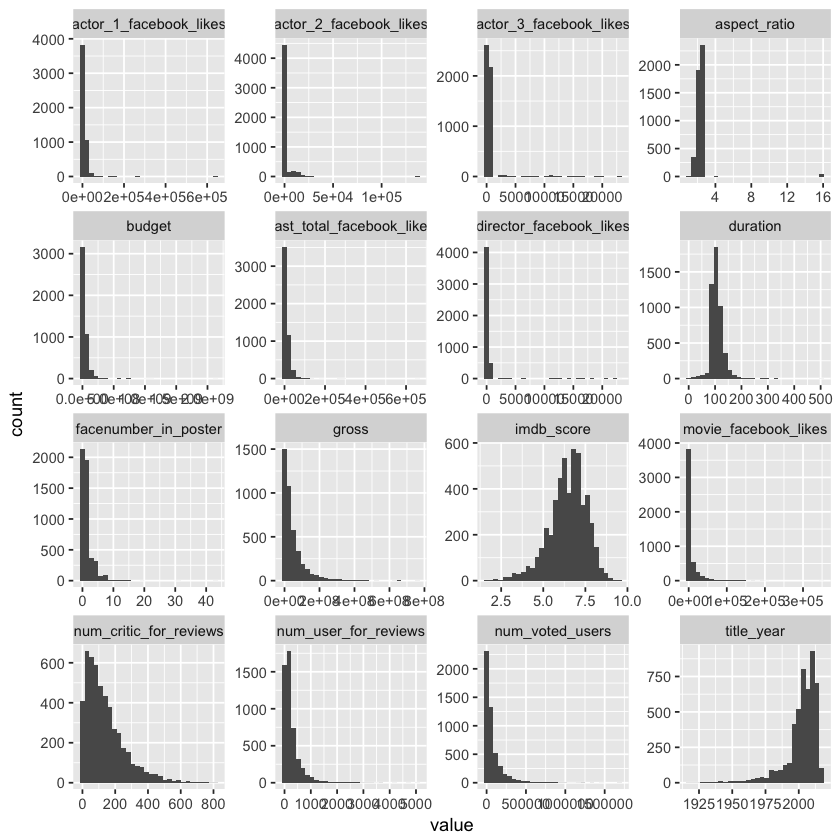

In [74]:
library(purrr)

movies %>%
    keep(is.numeric) %>%
    gather() %>%
    ggplot(aes(x = value)) +
        facet_wrap(~ key, scales = "free") +
        geom_histogram()

Some of these plots are highly skewed and make it difficult to see well (the top row for example). I would like to transform a few of them to log scale to make easier to interpret:

Starting with all facebook like plots:
* actor_1_facebook_likes
* actor_2_facebook_likes
* actor_3_facebook_likes
* cast_total_facebook_likes
* director_facebook_likes
* movie_facebook_likes

First, make subset of data frame:

In [75]:
movies_fb <- movies %>%
    select(actor_1_facebook_likes,
          actor_2_facebook_likes,
          actor_3_facebook_likes,
          cast_total_facebook_likes,
          director_facebook_likes,
          movie_facebook_likes)
head(movies_fb)

actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,director_facebook_likes,movie_facebook_likes
1000,936,855,4834,0,33000
40000,5000,1000,48350,563,0
11000,393,161,11700,0,85000
27000,23000,23000,106759,22000,164000
131,12,NA,143,131,0
640,632,530,1873,475,24000


First check out summary so I know what some of my min and max should be:

In [76]:
summary(movies_fb)

 actor_1_facebook_likes actor_2_facebook_likes actor_3_facebook_likes
 Min.   :     0.0       Min.   :     0         Min.   :    0.0       
 1st Qu.:   611.5       1st Qu.:   280         1st Qu.:  133.0       
 Median :   984.0       Median :   595         Median :  369.0       
 Mean   :  6556.9       Mean   :  1643         Mean   :  639.9       
 3rd Qu.: 11000.0       3rd Qu.:   917         3rd Qu.:  635.0       
 Max.   :640000.0       Max.   :137000         Max.   :23000.0       
 NA's   :7              NA's   :13             NA's   :23            
 cast_total_facebook_likes director_facebook_likes movie_facebook_likes
 Min.   :     0            Min.   :    0.0         Min.   :     0.0    
 1st Qu.:  1406            1st Qu.:    7.0         1st Qu.:     0.0    
 Median :  3086            Median :   49.0         Median :   162.5    
 Mean   :  9677            Mean   :  688.7         Mean   :  7487.4    
 3rd Qu.: 13740            3rd Qu.:  192.0         3rd Qu.:  3000.0    
 Max.   

In [77]:
# check sum total of likes for each


Now plot them with log base 10 transformation: Note, restricted to more than 0 fb likes:

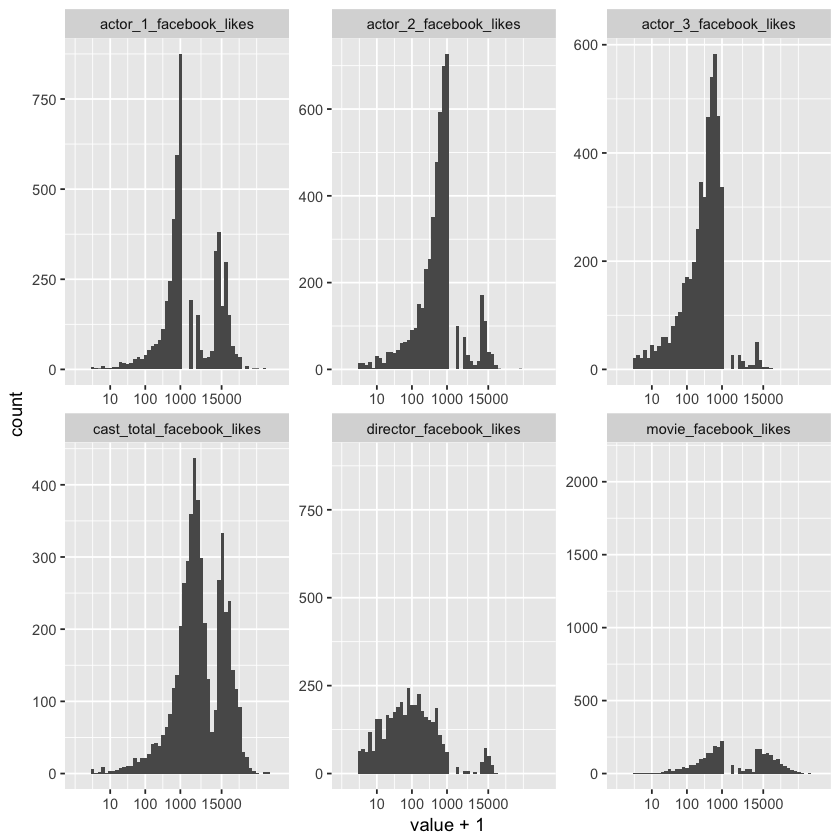

In [78]:
movies_fb %>%
    gather() %>%
    ggplot(aes(x = value + 1)) +
        geom_histogram(binwidth = .1, na.rm = TRUE) +
        scale_x_log10(breaks = c(10, 100, 1000, 15000), limits = c(1,650000)) +
        facet_wrap(~ key, scales = "free")

What are the gaps from? Looking at the original data I see that for some of the variables, the amount of likes are varied up until about 1000, but then after that they jump up in increments of 1000

What learn from doing this? 
* actors 1,2,3 fb likes seem to correlate well. 
* director fb likes much loser in quantity and spread more evenly betwen low numbers and 1000.

So now I've taken the log of all x value fb likes and binned them in a histogram. This has condensed the positive tail into my bins to give me a different perspective on an exponentially increasing x ticks scale.

And now everything else individually:

* budget
* gross
* num_user_for_reviews
* num_voted_users

In [79]:
movies_specs <- movies %>%
    select(budget,
          gross,
          num_user_for_reviews,
          num_voted_users)
head(movies_specs)

budget,gross,num_user_for_reviews,num_voted_users
237000000,760505847,3054,886204
300000000,309404152,1238,471220
245000000,200074175,994,275868
250000000,448130642,2701,1144337
NA,NA,NA,8
263700000,73058679,738,212204


In [80]:
summary(movies_specs)

     budget              gross           num_user_for_reviews num_voted_users  
 Min.   :2.180e+02   Min.   :      162   Min.   :   1         Min.   :      5  
 1st Qu.:6.000e+06   1st Qu.:  5304835   1st Qu.:  64         1st Qu.:   8560  
 Median :2.000e+07   Median : 25445749   Median : 156         Median :  34260  
 Mean   :3.505e+07   Mean   : 48325649   Mean   : 272         Mean   :  83470  
 3rd Qu.:4.425e+07   3rd Qu.: 62319416   3rd Qu.: 324         3rd Qu.:  96121  
 Max.   :2.128e+09   Max.   :760505847   Max.   :5060         Max.   :1689764  
 NA's   :491         NA's   :874         NA's   :21                            

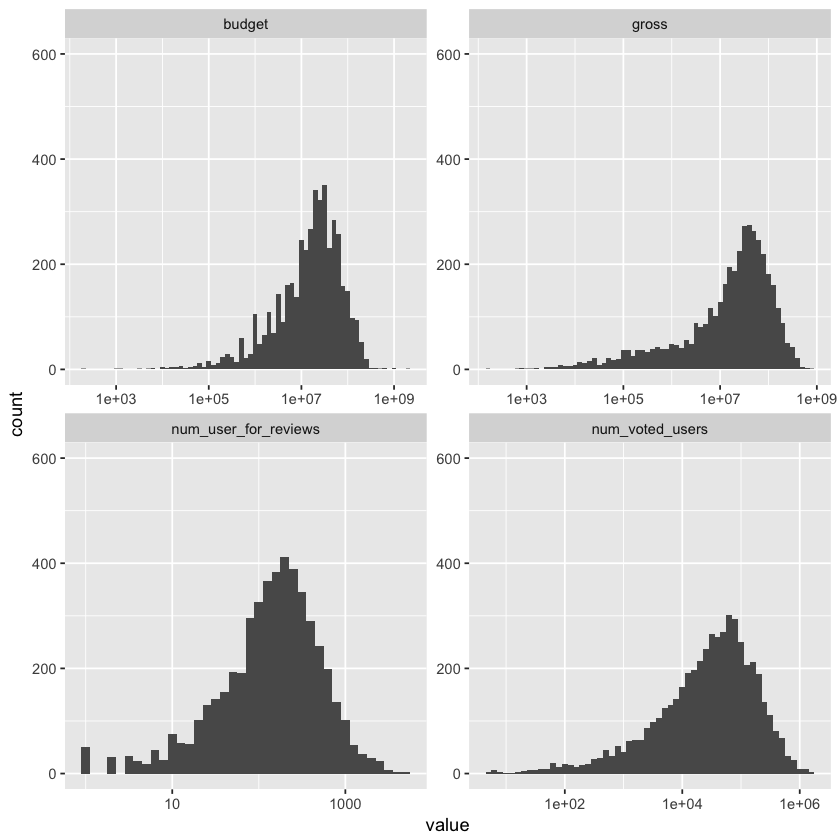

In [81]:
movies_specs %>%
    gather() %>%
    ggplot(aes(x = value)) +
        geom_histogram(binwidth = .1, na.rm = TRUE) +
        scale_x_log10() +
        ylim(0, 600) +
        facet_wrap(~ key, scales = "free")

How about some categoricals?

Check data set again to see what I want:

In [88]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Ones that are mostly easily countable:
* `color`
* `genres`
* `language`
* `country`
* `content_rating`

Show the top and bottom relative frequencies for each:

In [89]:
df_freq_summary <- function(name, df) {
  df %>%
    count_(name) %>%
    mutate(freq = n / sum(n)) %>%
    arrange(desc(n)) %>%
    headTail(top = 5, bottom = 5)
}

my_variables <- c("color", "genres", "language", "country", "content_rating")
lapply(my_variables, df_freq_summary, movies)

,color,n,freq
1,Color,4772,0.95
2,Black and White,207,0.04
3,NA,19,0
...,NA,...,...
11,Color,4772,0.95
21,Black and White,207,0.04
31,NA,19,0
,genres,n,freq
1,Drama,235,0.05
2,Comedy,205,0.04


Now do the same but treemap plots individually:

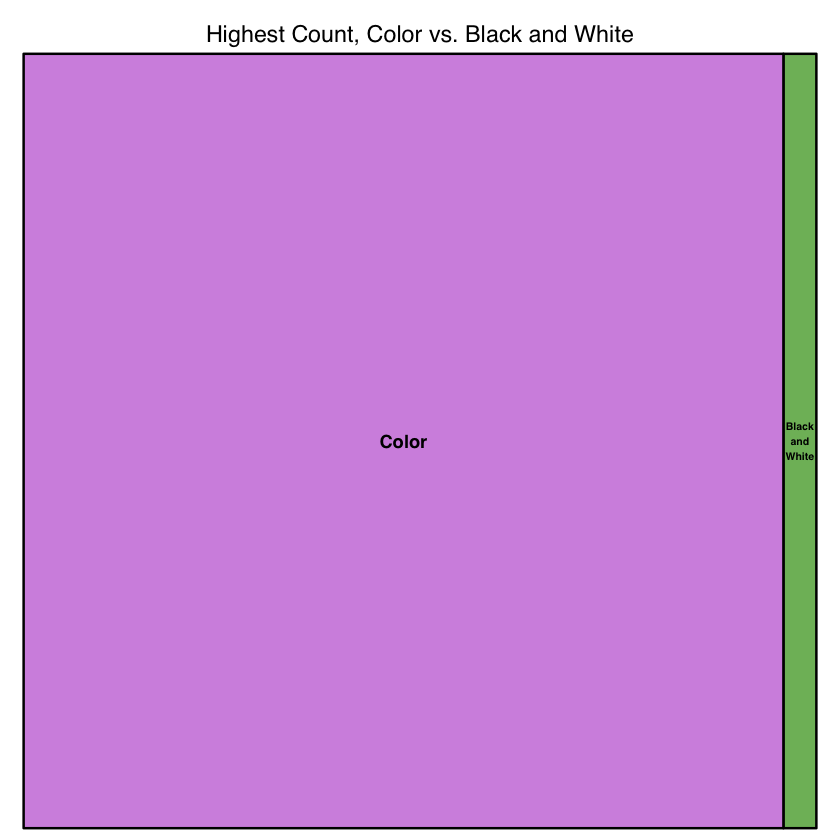

In [90]:
movies %>%
    group_by(color) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("color"),
            vSize = "Total_Response",
            title = "Highest Count, Color vs. Black and White")

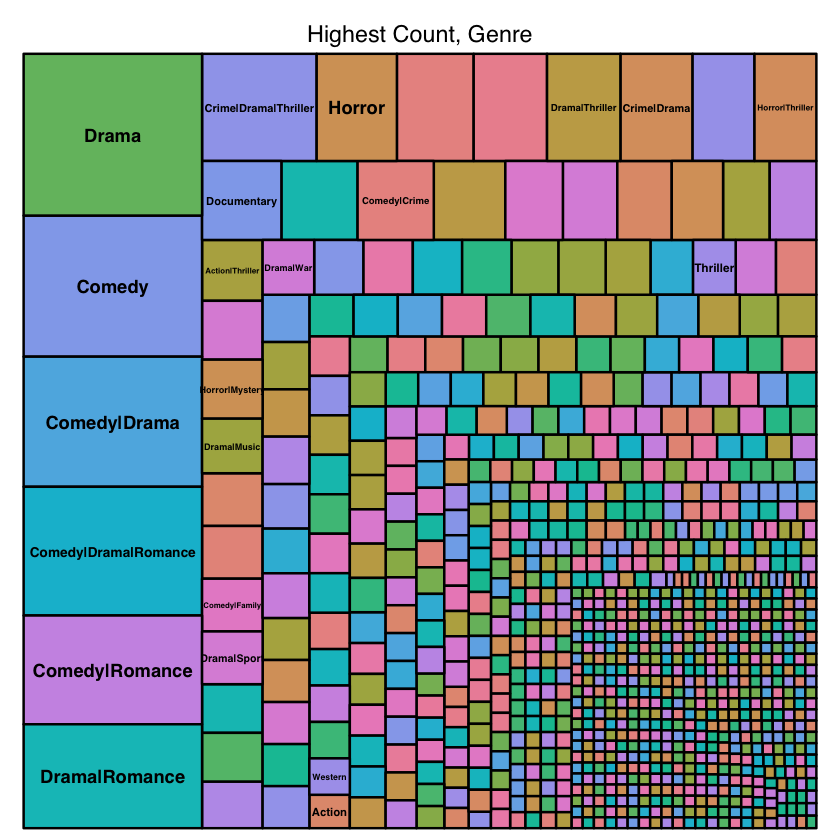

In [92]:
movies %>%
    group_by(genres) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("genres"),
            vSize = "Total_Response",
           title = "Highest Count, Genre")

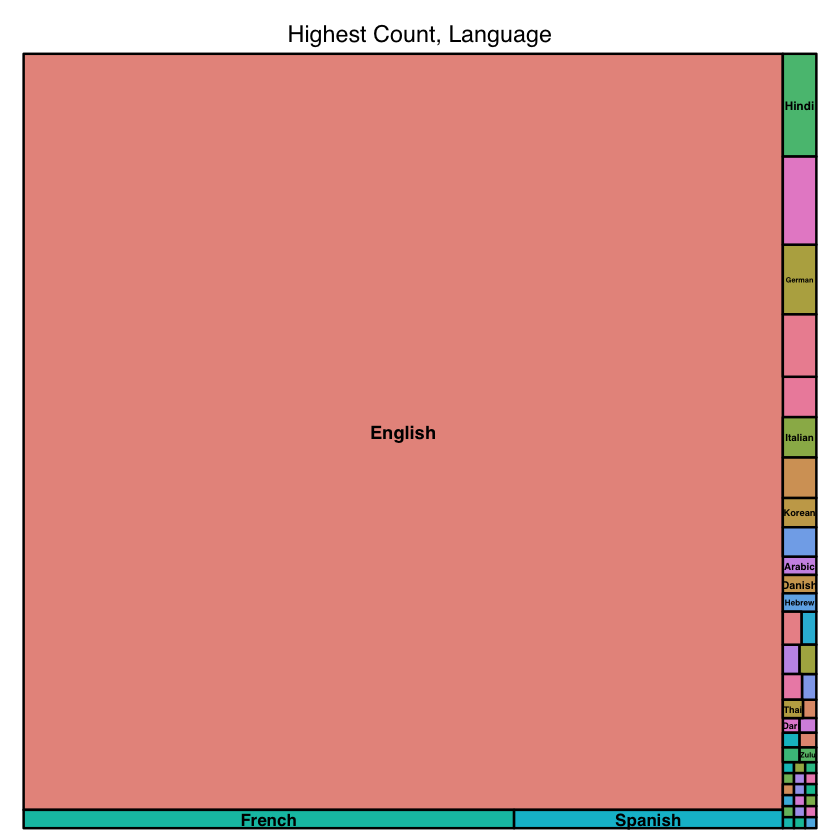

In [93]:
movies %>%
    group_by(language) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("language"),
            vSize = "Total_Response",
           title = "Highest Count, Language")

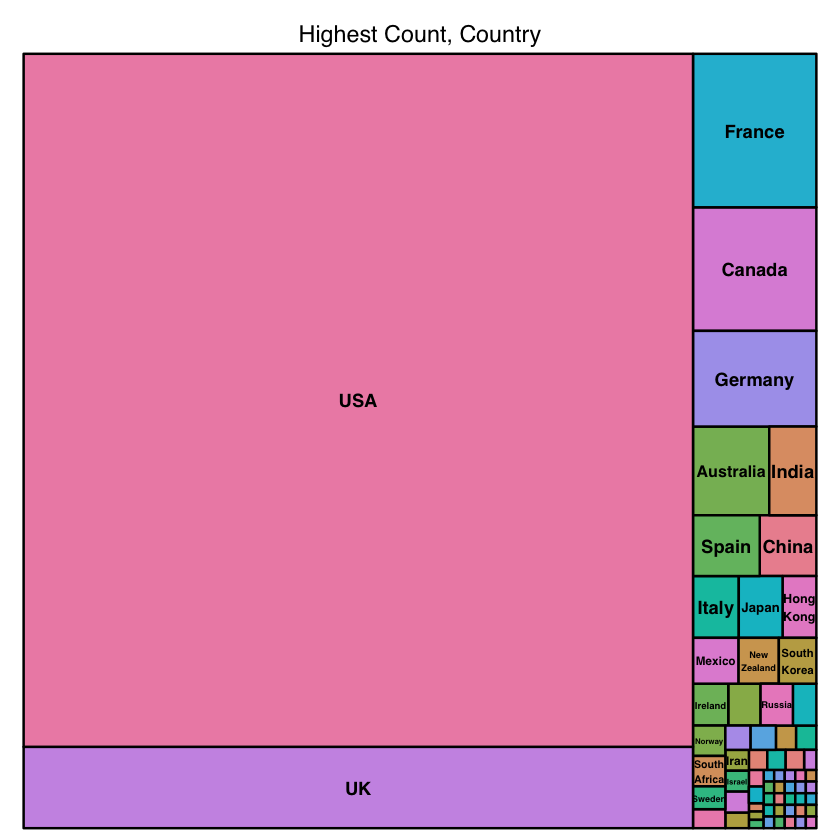

In [94]:
movies %>%
    group_by(country) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("country"),
            vSize = "Total_Response",
           title = "Highest Count, Country")

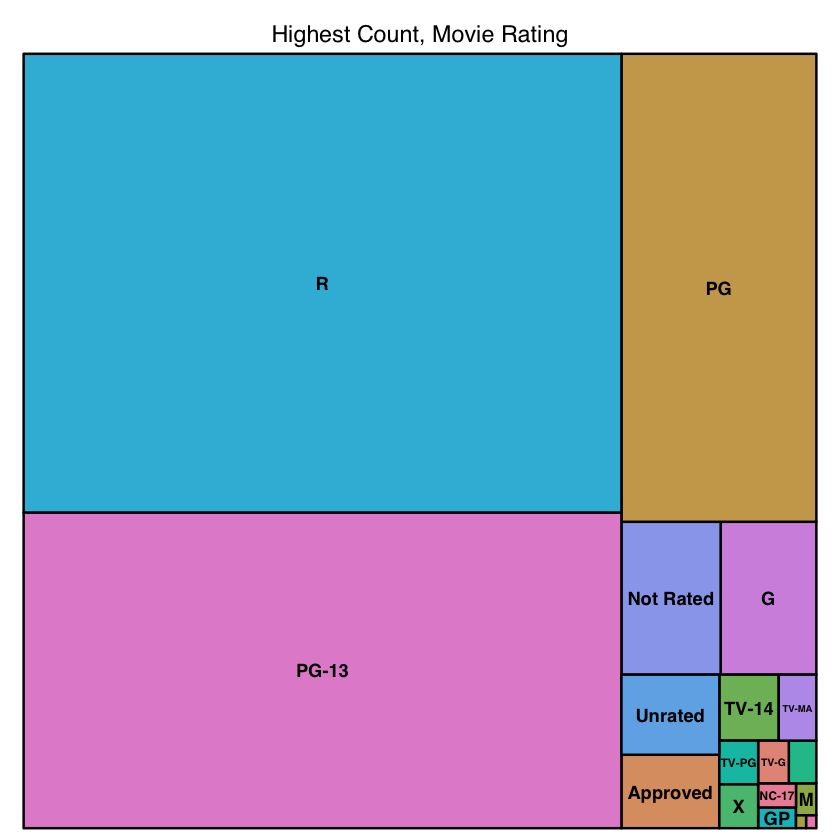

In [95]:
movies %>%
    group_by(content_rating) %>%
    mutate(count = 1) %>%
    summarise(Total_Response = sum(count)) %>%
    treemap(index = c("content_rating"),
            vSize = "Total_Response",
           title = "Highest Count, Movie Rating")

Now, add variable of how many genres a movies is given. Could be interesting:

In [97]:
movies

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,1902,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,387,English,USA,PG,260000000,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,1117,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,973,English,UK,PG,250000000,2009,11000,7.5,2.35,10000


In [99]:
movies <- mutate(movies,
                num_genres = sapply(gregexpr("[|]", movies$genres), length))
movies

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_genres
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,3
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,2
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,2
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,12,7.1,NA,0,1
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,2
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,2
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,English,USA,PG,260000000,2010,553,7.8,1.85,29000,6
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,3
